## DiegoMcDonald - Homework 6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

### The file `SDSS_MainBelt.csv` contains data on objects in the asteroid belt collected by the [Sloan Digital Sky Survey](http://www.sdss.org/).

The columns are:
- **`Name`** - Object name
- **`a`** - semi-major axis
- **`cA`** - SDSS a$^*$ color
- **`cI`** - SDSS i color (near infrared)
- **`cZ`** - SDSS z color (infrared)
- **`X`** - X position [au] - Sun-centered coords (10/29/2014)
- **`Y`** - Y position [au] - Sun-centered coords (10/29/2014)
- **`Z`** - Z position [au] - Sun-centered coords (10/29/2014)

### Read in the file `SDSS_MainBelt.csv`

In [81]:
T = QTable.read('SDSS_MainBelt.csv', format='ascii.csv')

## The Kirkwood Gaps - Mean Motion Resonances
- Orbital period [years]: `P` = a ** (3/2)
- Orbital Period of Jupiter: `Pjup` = 11.8618 years
- Make a histogram of: (`Pjup / P`)
- Bins = 150
- Invert the x-axis
- Draw vertical lines at (`Pjup / P`) = 1,2,3,4
- Label the axis
- Make the plot look nice

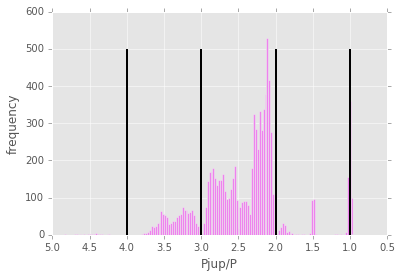

In [3]:
plt.style.use('ggplot')
a = T['a']
P = a**(3/2)
Pjup = 11.8618
Pnew = (Pjup/P)
fig,ax=plt.subplots(1,1)
ax.set_xlabel("Pjup/P")
ax.set_ylabel("frequency")
ax.vlines(1,0,500,linewidth=2)
ax.vlines(2,0,500,linewidth=2)
ax.vlines(3,0,500,linewidth=2)
ax.vlines(4,0,500,linewidth=2)
plt.hist(Pnew, bins=150, facecolor='Violet');
ax.invert_xaxis()

## The Position of the Asteroids 
- Make a plot of X vs Y for the asteroids 
- Make sure that 1 unit in X = 1 unit in Y
- Make the axes go through (0,0)
- Make the plot look nice

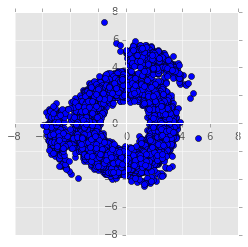

In [4]:
x=T['X']
y=T['Y']
fix,ax=plt.subplots(1,1)
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_aspect(1)
ax.plot(x, y, color='b', marker='o', linestyle='None')

## The Color of the Asteroids 
- Make three (3) plots in one row
- In each panel, put a plot of all of the asteroid positions as viewed from above. Use alpha = 0.20
- In the first panel, overplot the positions of C-Type asteroids using a different color and symbol
- In the second panel, overplot the positions of S-Type asteroids using a different color and symbol
- In the third panel, overplot the positions of V-Type asteroids using a different color and symbol
- The asteroid types can be determined from their colors (see image below)
- Make the plot look nice

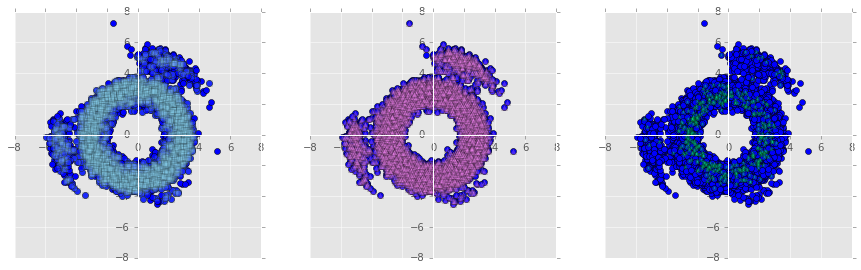

In [5]:
fig,ax=plt.subplots(1,3)
fig.set_size_inches(15,13)
x=T['X']
y=T['Y']
-0.15
cA = T['cA']
cI = T['cI']
cZ = T['cZ']
mask1=np.where(T['cA']<0)
mask2=np.where(cI-cZ > -0.15)
mask3=np.where(cI-cZ < -0.15)

ax[0].set_xlim(-8,8)
ax[0].set_ylim(-8,8)
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['left'].set_position('zero')
ax[0].set_aspect(1)
ax[0].plot(x, y, color='b', marker='o', linestyle='None')
ax[0].plot(x[mask1], y[mask1], color='skyblue', marker='s', linestyle='None', alpha = 0.2)

ax[1].set_xlim(-8,8)
ax[1].set_ylim(-8,8)
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['left'].set_position('zero')
ax[1].set_aspect(1)
ax[1].plot(x, y, color='b', marker='o', linestyle='None')
ax[1].plot(x[mask2], y[mask2], color='violet', marker='^', linestyle='None', alpha = 0.3)

ax[2].set_xlim(-8,8)
ax[2].set_ylim(-8,8)
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['left'].set_position('zero')
ax[2].set_aspect(1)
ax[2].plot(x, y, color='b', marker='o', linestyle='None')
ax[2].plot(x[mask3], y[mask3], color='springgreen', marker='*', linestyle='None', alpha = 0.4)


## Fitting data to a function
- The datafile `'FitMe.csv'` contains two columns of data (x,y)
- Plot the data x,y
- Fit the function below to the data
- Find the values of a,b,c that best fit the data
- Plot the fit with the data
- Make the plots look nice

$$\Large f(x) = a \sin(bx) \ e^{-cx} $$

In [80]:
from scipy.optimize import curve_fit
R = QTable.read('FitMe.csv', format='ascii.csv')

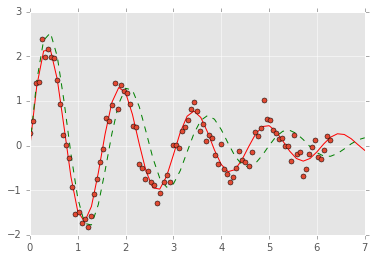

In [79]:
R = QTable.read('FitMe.csv', format='ascii.csv')


x=R['x']
y=R['y']

def gibson(x,a,b,c):
    return a*np.sin(b*x*2*np.pi)*np.exp(-x*c)

Aguess = 3
Bguess = .6
Cguess = .4

fitpars, error=curve_fit(gibson,x,y,p0=[Aguess,Bguess,Cguess])

Z = np.linspace(0,7,50)

plt.plot(Z, gibson(Z, *fitpars), 'r-')
plt.plot(Z, gibson(Z,Aguess,Bguess,Cguess), 'g--')

plt.plot(x,y,marker="o",linestyle="None",markersize=5);






#fig,ax=plt.subplots(1,1)

#Fit1 = np.polyfit(x, y, 2)
#FitY = np.polyval(x, Fit1)
#ax.plot(x, y, color='b', marker='o', linestyle='none');


---

### Asteroid classes - SDSS Colors

---

<center><img src="images/Colors.jpg" width=600px></center>

### Due Tues Feb 16 - 5pm
- `cp FirstLast_HW6.ipynb ~pikaia/HOMEWORK/`
- Make sure to change the file name and Title to your name!

In [ ]:
#evolved close to sun, primitive far away